# Global Payments Inc. Common Stock: Risk Evaluation

In order to determine the risk of investing in Global Payments Inc. stock, I have conducted a quantitative analysis using the Monte Carlo method with Brownian Motion and the Capital Asset Pricing Model.  I used a csv file of Global Payments Inc.'s stock price data for the past year, the yield of the 3-month treasury bill, a report from Goldman Sachs about expected market returns, and Global Payments, Inc.'s beta.  By comparing expected returns to a normalized distribution of 500 projected outcomes of Global Payments Inc.'s stock price in the next year, I have determined that there may be too much risk relative to the forecasted performance of Global Payments Inc. stock for it to be investable at this time.

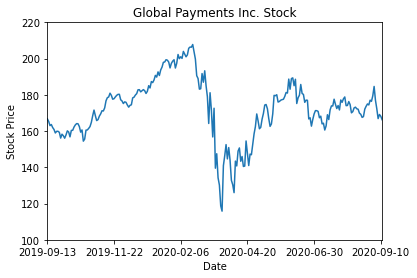

The results of the data are skewed due to a large drop in price caused by the effects of COVID-19.  Scenarios where this analysis is relevant include COVID-19 causing lingering effects on the economy, in the event of a second wave of COVID-19, and if the Federal Reserve raises interest rates post-COVID-19.  

# Capital Asset Pricing Model

Expected Stock Return = Risk-Free-Rate + beta * (Expected Market Return - Risk-Free-Rate)

The Capital Asset Pricing Model was used to determine the returns that investors should expect to receive based on the systematic risk of Global Payments Inc. stock.  On the individual stock level, the Capital Asset Pricing Model uses a company's beta, or its risk relative to the market based on the stock's standard deviation compared to the standard deviation of the market; the risk-free-rate, which is the return an investor would expect to receive if he or she invested in the safest financial instrument available; and the expected return for the market.

I used the yield of the 3-Month Treasury Bill for the Risk-Free-Rate, which is a typical measure used.  Due to the extremely low interest rate environment that we are in, investors' expected returns would be greatly reduced if the Federal Reserve reverted to pre-COVID interest rates.    

I used the yield of the 3-month U.S. Treasury Bill for the risk-free-rate, which is a typical benchmark used for the risk-free-rate due to its short maturity time period and the perceived security of the U.S. government.

The company's beta is available on financial websites such as yahoo finance.

I used a market forecast by Goldman Sachs for the expected market return.

In [5]:
risk_free_rate = .0011
beta = 1.10
expected_market_return = .17

expected_return = risk_free_rate + beta*(expected_market_return - risk_free_rate)

print('Expected return:', round(expected_return, 3))

Expected return: 0.187


Based on the last price of 166.27 in the GPN stock data, the market should expect Global Payments Inc. stock hit 197.34 in one year. 

# Brownian Motion

class Brownian_Motion:
    '''Contains __init__ function with self, drift, volatility, delta_time, and start_price methods and contains time_step function with self method and Brownian Motion calculations.'''

    def __init__(self, drift, volatility, delta_time, start_price):
        '''Contains self, drift, volatility, delta_time, and start price methods for Brownian Motion calculation.'''
        self.drift = drift
        self.volatility = volatility
        self.delta_time = delta_time
        self.current_price = start_price
        self.asset_prices = [start_price]
        
           
    def time_step(self):
        '''Contains Brownian Motion calculations and generates a new price based on where we are in the loop.'''
        delta_Brownian = np.random.normal(0, np.sqrt(self.delta_time))
        delta_price = self.drift * self.delta_time * self.current_price + \
        self.volatility * self.current_price * delta_Brownian
        self.asset_prices.append(self.current_price + delta_price)
        self.current_price = self.current_price + delta_price

Brownian Motion was initially conceived as a simulation of the random simulation of particle movement in a fluid.  In order to simulate Brownian Motion for the GPN stock price, I created a Brownian_Motion class with methods for the calculations. 

The change in Brownian Motion is equal to a random number with normal distribution between 0 and the square root of the change in time.  The change in price is equal to the "drift" or in stock price terms, the return multiplied by the change in time multiplied by the curent price added to the volatility (in stock terms, the standard deviation of the returns) multiplied by the current price multiplied by the change in Brownian Motion.  In order to achieve the Brownian Motion, we append the current price plus the change in price to the asset_prices method and make a new current price that is the current price added by the change in price.

num_simulations = 500
num_days = 252
delta_time = 1/num_days

for sim in range(num_simulations):
    processes = []
    

    for i in range(0, 100):
        processes.append(Brownian_Motion(avg_daily_return, vol, delta_time, last_price))

    for process in processes:
        tte = 1
        while((tte - process.delta_time) > 0):
            process.time_step()
            tte = tte - process.delta_time

In order to run the Monte Carlo simulations with Brownian Motion, I used a for loop that created individual tracks for 500 different simulations that I wanted to run and created a list called processes to which I appended with the Brownian_Motion class in a nested for loop.

For the Brownian_Motion arguments, I used the average daily returns of GPN stock, the standard deviation, a change in time equal to one over the amount of trading days in a year, and took the last price in the data, which would be updated in every loop.

In order to break the loops and implement the time_step function, I created a counter that counts down every time the loop uses the time_step function until the change in time is equal to 252/252.  An example of the result is below:

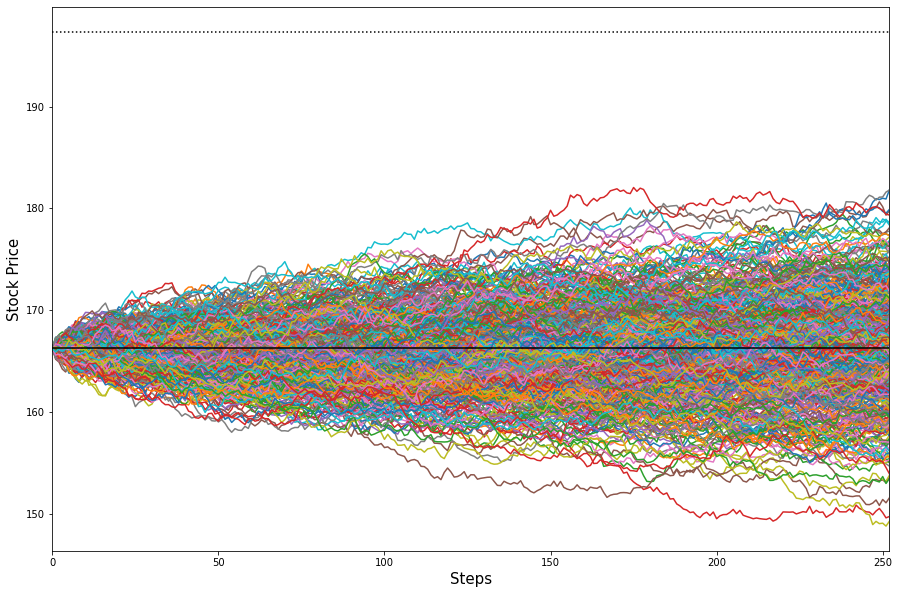

The solid black line indicates the initial starting price used by the simulation and the dotted black line shows the expected return for the Global Payments Inc. stock based on the Capital Asset Pricing Model.  The steps indicate the number of days past the initial start date that we are forecasting.  

Since the expected return falls well out of the range for even the most optimistic outliers, we can determine that there may be too much risk associated with the Global Payments Inc. stock because the returns that investors would expect from the stock for taking the risk of investing in it exceeds the normalized distribution of its projected returns.

# References

https://gordcollins.com/stock-market/factors-forecasts/

https://finance.yahoo.com/quote/GPN?p=GPN

https://finance.yahoo.com/quote/GPN/history?p=GPN

https://www.quantconnect.com/tutorials/introduction-to-options/stochastic-processes-and-monte-carlo-method

https://www.youtube.com/watch?v=KCdcRAcJBPg

https://www.youtube.com/watch?v=QIM12cvCu4c

https://ycharts.com/indicators/3_month_t_bill#:~:text=3%20Month%20Treasury%20Bill%20Rate%20is%20at%200.11%25%2C%20compared%20to,long%20term%20average%20of%204.28%25.